In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
from scipy.stats import norm
from scipy.stats import stats

## Disclaimer
This notebook based on labs from Inferential Statistics course by Duke University from https://www.coursera.org/learn/inferential-statistics-intro <br>
I adapted R code from these labs and reproduced in Jupyter Notebooks and rewrote in Python

## The data
In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AntonIsHere/Inferetial_Statistics/master/nc.csv")

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

|variable|description|
|:------|:------|
|fage |father’s age in years. |
|mage |mother’s age in years. |
|mature	|maturity status of mother.|
|weeks	|length of pregnancy in weeks.|
|premie	|whether the birth was classified as premature (premie) or full-term.|
|visits	|number of hospital visits during pregnancy.|
|marital	|whether mother is married or not married at birth.|
|gained	|weight gained by mother during pregnancy in pounds.|
|weight	|weight of the baby at birth in pounds.|
|lowbirthweight	|whether baby was classified as low birthweight (low) or not (not low).|
|gender	|gender of the baby, female or male.|
|habit	|status of the mother as a nonsmoker or a smoker.|
|whitemom	|whether mom is white or not white.|

As a first step in the analysis, we should take a look at the variables in the dataset. This can be done using the ***.dtypes*** command:

In [3]:
df.dtypes

Unnamed: 0          int64
fage              float64
mage                int64
mature             object
weeks             float64
premie             object
visits            float64
marital            object
gained            float64
weight            float64
lowbirthweight     object
gender             object
habit              object
whitemom           object
dtype: object

## Exploratory data analysis

We will first start with analyzing the weight gained by mothers throughout the pregnancy: gained.

Using visualization and summary statistics, describe the distribution of weight gained by mothers during pregnancy. The summary function can also be useful.

In [4]:
df['gained'].describe()

count    973.000000
mean      30.325797
std       14.241297
min        0.000000
25%       20.000000
50%       30.000000
75%       38.000000
max       85.000000
Name: gained, dtype: float64

Next, consider the possible relationship between a mother’s smoking habit and the weight of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

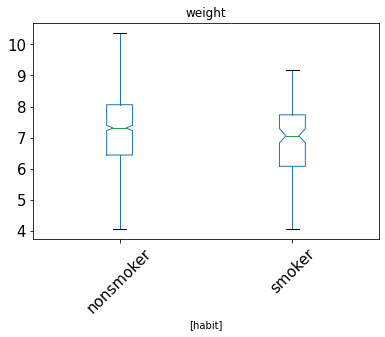

In [5]:
boxplot = df.boxplot(column=['weight'], by=['habit'],
                     grid=False, 
                     rot=45, fontsize=15, 
                     notch = True, 
                     showfliers = False )
plt.suptitle('')
plt.show()

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following to first group the data by the habit variable, and then calculate the mean weight in these groups using the mean function.

In [6]:
weight = df['weight']
nsm_weight = df.loc[df['habit'] == 'nonsmoker']['weight']
sm_weight = df.loc[df['habit'] == 'smoker']['weight']
df.groupby('habit').apply(lambda x: x['weight'].sum()/x['weight'].count())

habit
nonsmoker    7.144273
smoker       6.828730
dtype: float64

There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test.

## Inference


<p>$H_{0}$:$μ_{smoking}$ = $μ_{non−smoking}$</p>
$H_{A}$:$μ_{smoking}$ $\neq$ $μ_{non−smoking}$


## Distribution of weight where Habit = non-smoking 

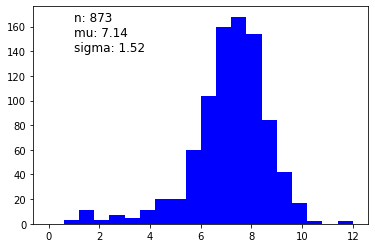

In [7]:
mu_nonsmoking = round(nsm_weight.mean(),2)
n_nonsmoking = len(nsm_weight)
sigma_nonsmoking = round(nsm_weight.std(),2)

plt.hist(nsm_weight,20, color = 'blue', range = (0,12))
plt.text(1., 140, 'n: ' + str(n_nonsmoking) +
         '\nmu: ' + str(mu_nonsmoking) + 
         '\nsigma: ' + str(sigma_nonsmoking),
        fontsize=12)
plt.show()

## Distribution of weight where Habit = smoking

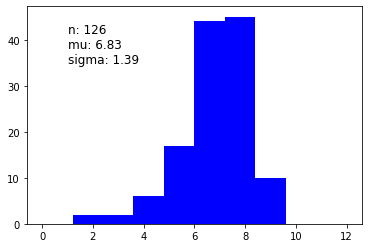

In [8]:
mu_smoking = round(sm_weight.mean(),2)
n_smoking = len(sm_weight)
sigma_smoking = round(sm_weight.std(),2)

plt.hist(sm_weight,10, color = 'blue', range = (0,12))
plt.text(1., 35, 'n: ' + str(n_smoking) +
         '\nmu: ' + str(mu_smoking) + 
         '\nsigma: ' + str(sigma_smoking),
        fontsize=12)
plt.show()

In [9]:
# Calculating 95% confidence interval
cm = sms.CompareMeans(sms.DescrStatsW(nsm_weight), sms.DescrStatsW(sm_weight))
ci_values = [round(num, 4) for num in cm.tconfint_diff(usevar='unequal')]

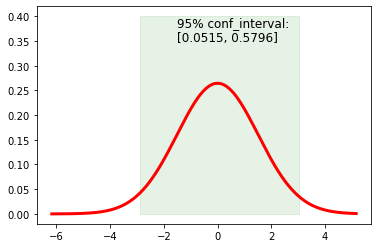

In [10]:
mu, sigma = weight.mean(), weight.std()
s = np.random.normal(mu, sigma, 1000)

bins = np.linspace(s.min(), s.max(), 1000)  

# Plot the distribution curve with confidence interval
plt.plot(bins-mu, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       
         linewidth=3, color='r')
ci = norm(*norm.fit(s)).interval(0.95)  # fit a normal distribution and get 95% c.i.
plt.fill_betweenx([0, 0.4], ci[0]-mu, ci[1]-mu, color='g', alpha=0.1)  # Mark between 0
plt.text(-1.5, 0.35, '95% conf_interval: \n' + str(ci_values),
        fontsize=12)
plt.show()

In [11]:
# Calculating t-test and p-value
stats.ttest_ind(nsm_weight, sm_weight, axis=0, equal_var=False)

Ttest_indResult(statistic=2.3590109449335013, pvalue=0.01945055644373227)

## Conclusion

We calculated confidence difference between weight of smoking and non-smoking mothers as **[0.05, 0.58]** and p-value of roughly **2%**, which means we would reject null hypothesis.<br>
So, we obtained convincing evidence that there is a difference between babies born to nonsmoker mothers are on average ***0.05 to 0.58 pounds heavier*** at birthe than babies born to smoker mothers.